# Lab 4

# -----------Aimun Khan (aak2629) and Caleb Johnson (cdj 2273)----------

# Problem 1.1) Generate 20 random points in d=3 from a Gaussian multivariate distribution with mean [0,0,0] and covariance matrix $$\sum_{1} = \begin{bmatrix}
    .5 & 0 & 0\\
     0 & .5 & 0\\
     0 & 0 & .7
\end{bmatrix}$$

In [1]:
import pandas as pd
import numpy as np

mean = [0, 0, 0]
cov = [[.5, 0, 0], [0, .5, 0], [0, 0, .7]]

Xs = [None]*20
Ys = [None]*20
Zs = [None]*20


Xs, Ys, Zs = np.random.multivariate_normal(mean, cov, size=(20,1)).T

#points = pd.DataFrame(columns = ['X_points', 'Y_points', 'Z_points'])
Xs = pd.DataFrame(Xs).T
Ys = pd.DataFrame(Ys).T
Zs = pd.DataFrame(Zs).T

points1 = pd.merge(Xs, Ys, left_index=True, right_index=True, how='outer')
points1 = pd.merge(points1, Zs, left_index=True, right_index=True, how='outer')
points1.columns = ['Xs', 'Ys', 'Zs']
points1
    


,Xs,Ys,Zs
0,0.946572,0.969314,-0.554643
1,0.569979,-0.633901,-0.107289
2,-0.757830,-1.345787,-0.251134
3,-0.387271,-0.164446,-1.090774
4,0.211965,0.164355,0.572403
5,-0.412913,-0.072711,-0.632957
6,0.194791,-0.090334,0.153433
7,-0.508042,-1.188474,-0.184057
8,-0.268104,0.221425,-1.699004
9,-0.684055,-1.306341,0.203434


# Let's call this data with label 1. Also generate 20 random points in d=3 from another Gaussian with mean [1,1,1] and covariance matrix $$\sum_{1} = \begin{bmatrix}
    .5 & 0 & 0\\
     0 & .5 & 0\\
     0 & 0 & .01
\end{bmatrix}$$

In [2]:
mean = [1, 1, 1]
cov = [[.5, 0, 0], [0, .5, 0], [0, 0, .01]]

Xs = [None]*20
Ys = [None]*20
Zs = [None]*20


Xs, Ys, Zs = np.random.multivariate_normal(mean, cov, size=(20,1)).T

#points = pd.DataFrame(columns = ['X_points', 'Y_points', 'Z_points'])
Xs = pd.DataFrame(Xs).T
Ys = pd.DataFrame(Ys).T
Zs = pd.DataFrame(Zs).T

points2 = pd.merge(Xs, Ys, left_index=True, right_index=True, how='outer')
points2 = pd.merge(points2, Zs, left_index=True, right_index=True, how='outer')
points2.columns = ['Xs', 'Ys', 'Zs']
#points = points1.append(points2)
#points.columns = ['Xs', 'Ys', 'Zs']


# Let's call that data with label 2. Create a 3D plot of the clouds of data points, labeled with the two labels.

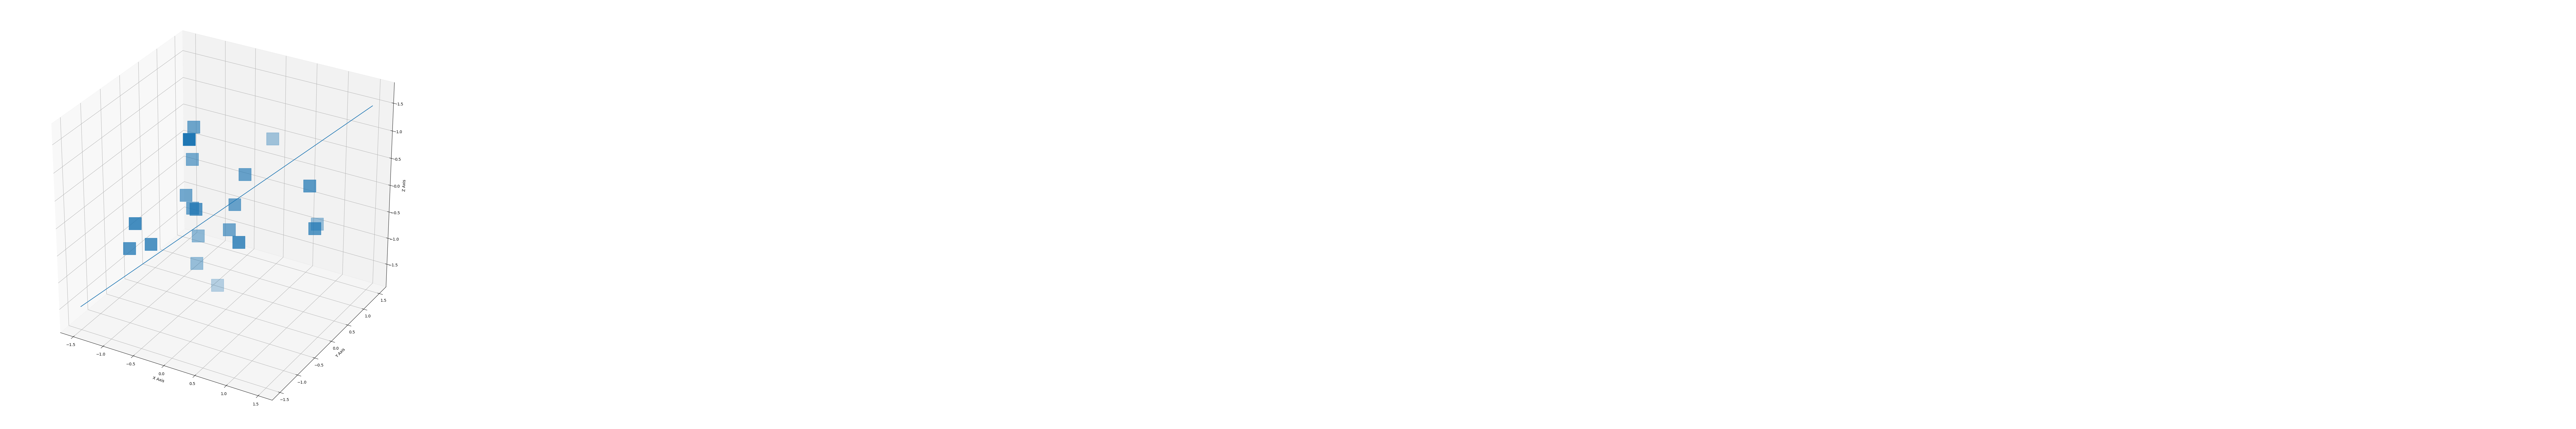

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

fig = plt.figure(figsize=(20,20), dpi= 100, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

zline = np.linspace(-1.5, 1.5,300)
xline = zline
yline = zline
ax.plot3D(xline, yline, zline)

xdata = points1['Xs']
ydata = points1['Ys']
zdata = points1['Zs']
ax.scatter3D(xdata, ydata, zdata, s=1000, marker='s')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
#plt.figsize=(20,60,20)
plt.show()


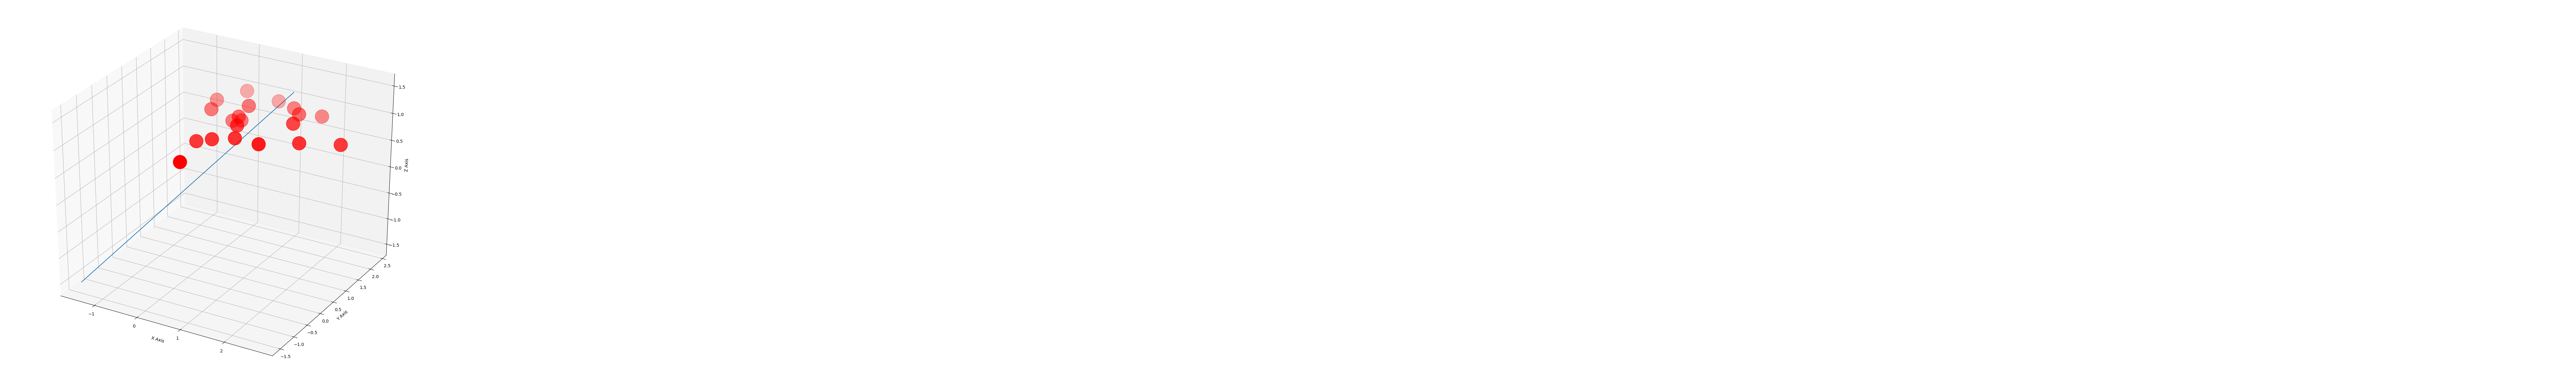

In [12]:
fig = plt.figure(figsize=(18, 16), dpi= 100, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

zline = np.linspace(-1.5, 1.5,300)
xline = zline
yline = zline
ax.plot3D(xline, yline, zline)

xdata = points2['Xs']
ydata = points2['Ys']
zdata = points2['Zs']
ax.scatter3D(xdata, ydata, zdata, s=1000, marker='o', c='r')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()


# 1.2) What do the points look like?

# We can see that the first set of points are distributed rather evenly around the origin (mean [0,0,0]) in all directions, with slightly more variance along the z-axis, which can be verified by noticing z-axis variance in the covariance matrix. 

# The second set of points are distributed near [1,1,1] but have very little variance along the z-axis. This plot almost appears to be 2D, which makes sense considering the .01 standard deviation associated with the z terms in this distribution.

In [239]:
points = points1.append(points2)
points.columns = ['Xs', 'Ys', 'Zs']
points = points.reset_index()
points = points.drop('index', axis=1)
points.cov()

,Xs,Ys,Zs
Xs,0.578614,0.275960,0.285781
Ys,0.275960,0.692023,0.259490
Zs,0.285781,0.259490,0.515799


# 1.3) Build the covariance matrix of all the RVs. 

# Let $L$ be a column vector of the standard deviations of each feature in our 'points' DataFrame, where $L_{0}$ = std(Xs), $L_{1}$ = std(Ys), $L_{2}$ = std(Zs).

# Then $L*L^T$=cov(points)

In [240]:
xsd = points.Xs.std()
ysd = points.Ys.std()
zsd = points.Zs.std()

stdev = pd.DataFrame([xsd, ysd, zsd])
print(stdev)
cov = pd.DataFrame(np.matmul(stdev, stdev.T))
cov

          0
0  0.760667
1  0.831879
2  0.718192


,0,1,2
0,0.578614,0.632783,0.546305
1,0.632783,0.692023,0.597449
2,0.546305,0.597449,0.515799


# Next, we find the e-values and e-vectors of our covariance matrix using numpy

In [241]:
from numpy import linalg

values, vectors = linalg.eig(cov)
print(values)
print(vectors)

[ 1.78643641e+00 -1.82492378e-18  7.69405058e-17]
[[-0.56911607  0.2542512   0.74303529]
 [-0.62239548 -0.7546678  -0.66914626]
 [-0.53733673  0.60484117 -0.01191007]]


# The two largest eigenvalues are: $$\lambda1=1.786$$  $$\lambda3=7.69*10^{-17}$$

# Their corresponding eigenvectors are: $$v1 = \begin{bmatrix}
    -.56911607\\
     .2542512\\
     .74303529
\end{bmatrix}$$ $$v3 = \begin{bmatrix}
    -.53733673\\
     .60484117\\
     -.01191007
\end{bmatrix}$$

# For PCA, we want to find these two eigenvectors, normalize them, and then project our data onto those normalized vectors.

In [242]:
a = vectors[0]
a = a.T
v1regconst = np.matmul(a, vectors[0])
a = vectors[2]
a = a.T
v2regconst = np.matmul(a, vectors[2])
points = pd.DataFrame(points)
meanx = points.Xs.mean()
meany = points.Ys.mean()
meanz = points.Zs.mean()
mean = [meanx, meany, meanz]

def getProjections(points, vector1, vector2, v1regconst, v2regconst):
    projections = pd.DataFrame(columns=['newx', 'newy'])
    u1 = vectors[0]/v1regconst
    u2 = vectors[2]/v2regconst
    for i in points.iterrows():
        t1 = np.matmul(u1.T, points.iloc[i])
        t2 = np.matmul(u2.T, points.iloc[i])

        projections = projections.append({'newx': t1, 'newy': t2}, ignore_index=True)
        
    return projections

proj1 = getProjections(points1, vectors[0], vectors[2], v1regconst, v2regconst)
proj2 = getProjections(points2, vectors[0], vectors[2], v1regconst, v2regconst)

    

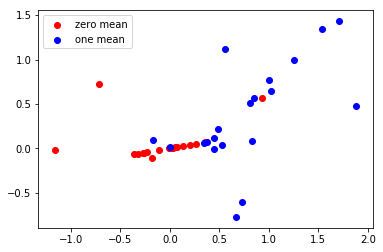

In [243]:
plt.scatter(proj1.newx, proj1.newy, c='r', label='zero mean')
plt.scatter(proj2.newx, proj2.newy, c='b', label='one mean')
plt.legend()
plt.show()

# Since the data is labelled, we can more easily see the groupings of the two distributions. The [1,1,1] mean distribution is grouped mostly above 1 on the x and y-axis, and the zero-mean distribution is grouped mostly around the origin, as expected.

# Problem 2.

## Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a singular value decomposition on this matrix using linalg.svd. You can perform a low-rank approximation by zeroing out singular values and keeping only the top k. Show the best rank k = 2, k = 5 and k = 10 approximation to Mona Lisa.


#### Let's just look at the image

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image

In [20]:
def draw(img):
    plt.figure(figsize=(9, 6))
    plt.imshow(img)

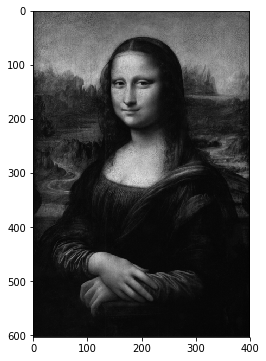

In [31]:
img = Image.open('mona_lisa.png')
plt.figure(figsize=(9, 6))
draw(img)

#### Import the image and convert to a numpy array

In [22]:
import matplotlib.image as img

In [23]:
mona_lisa = img.imread('mona_lisa.png')
mona_lisa.shape

(603, 400, 4)

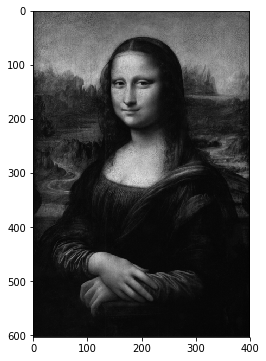

In [32]:
draw(mona_lisa)

#### Singular value decomposition

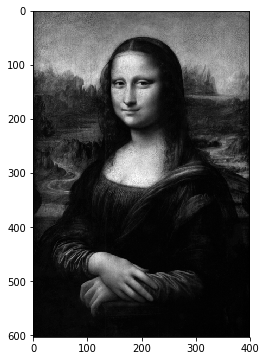

In [39]:
imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')

In [25]:
from numpy.linalg import svd

In [40]:
U, sigma, V = svd(imgmat)
print('U', U.shape)
print('sigma', sigma.shape)
print('V', V.shape)

U (603, 603)
sigma (400,)
V (400, 400)


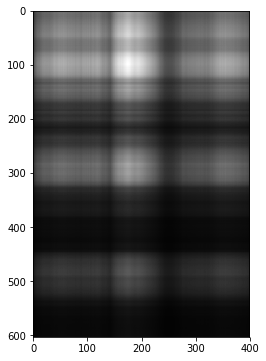

In [46]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
draw(reconstimg)

#### For different i values:

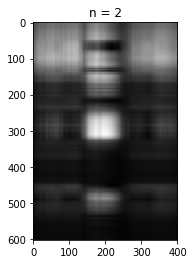

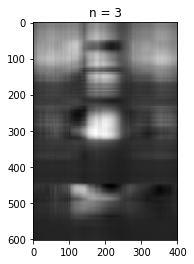

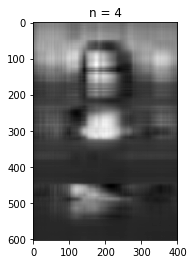

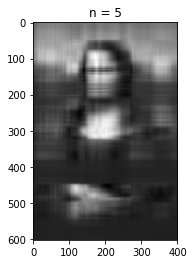

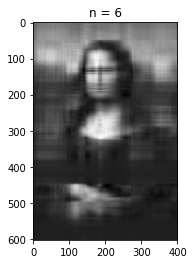

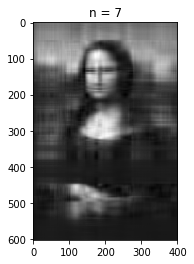

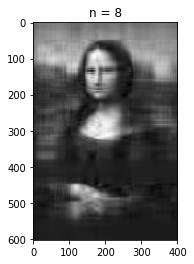

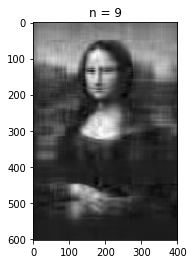

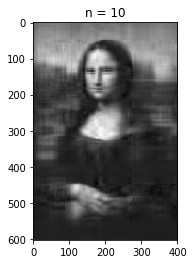

In [50]:
for i in range(2, 11):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

#### Low rank approximation

In [53]:
compressedimg = np.zeros((len(U), len(V)))

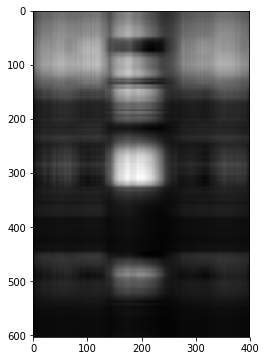

In [54]:
for i in range(2):
    compressedimg += sigma[i] * np.outer(U.T[i], V[i])
draw(compressedimg)

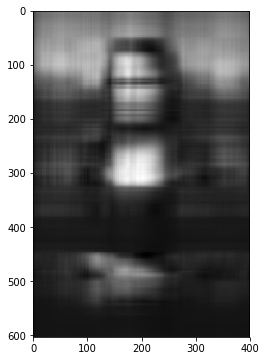

In [55]:
for i in range(5):
    compressedimg += sigma[i] * np.outer(U.T[i], V[i])
draw(compressedimg)

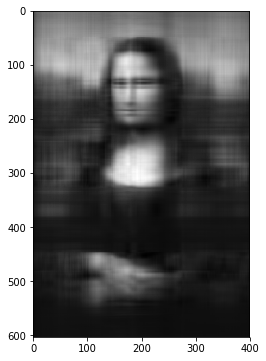

In [56]:
for i in range(10):
    compressedimg += sigma[i] * np.outer(U.T[i], V[i])
draw(compressedimg)

## If each pixel is represented by two bytes, how many bits is your compressed Mona Lisa for each of those k rank approximations?

### compressed Monsa Lisa is:

### (2 bytes) x (mxk matrix) x (kxk matrix) x (kxn matrix)

#### for k=2:
#### 2 x (603 x 2) x (2 x 2) x (400 x 2)  = 7718400 bytes

#### for k=5:
#### 2 x (603 x 5) x (5 x 5) x (400 x 5)  = 301500000 bytes

#### for k=10:
#### 2 x (603 x 10) x (10 x 10) x (400 x 10)  = 4824000000 bytes


## Problem 3. Download files CorrMat1.csv and CorrMat3.csv from Canvas. These are each 100 by 100 matrices. Look at the data and find which entries are corrupted. Then try to correct these corrupted entries. Explain your approach.

In [ ]:
#### Read csvs as images

In [17]:
import pandas as pd
data1 = pd.read_csv('CorrMat1.csv')
data3 = pd.read_csv('CorrMat3.csv')

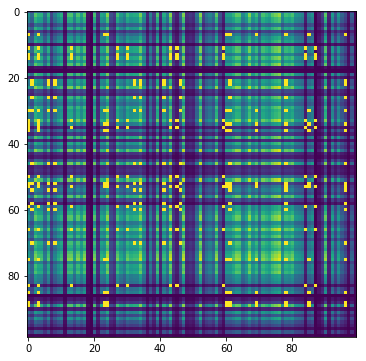

In [21]:
draw(data1)

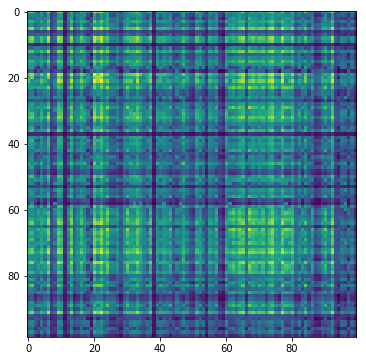

In [22]:
draw(data3)

#### The yellow spots are corrupted

#### Low-rank approximation with rank = 1

In [32]:
U, sigma, V = svd(data1)
print('U', U.shape)
print('sigma', sigma.shape)
print('V', V.shape)

U (99, 99)
sigma (99,)
V (100, 100)


In [33]:
compressedimg = np.zeros((len(U), len(V)))

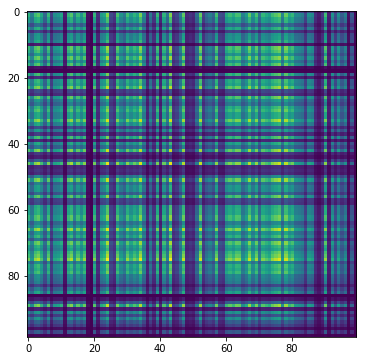

In [34]:
for i in range(1):
    compressedimg += sigma[i] * np.outer(U.T[i], V[i])
draw(compressedimg)

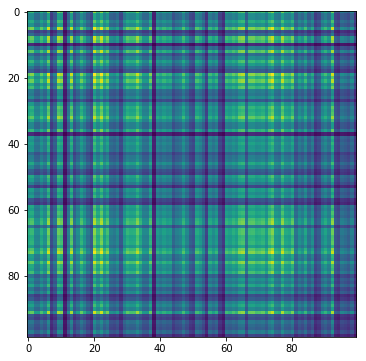

In [39]:
U, sigma, V = svd(data3)
compressedimg = np.zeros((len(U), len(V)))
for i in range(1):
    compressedimg += sigma[i] * np.outer(U.T[i], V[i])
draw(compressedimg)

## Doing low-rank approximation filters out the yellow pixels because individuals pixels don't contribute to the variance, so they get filtered out as noise.

# -----------------------------------------------------------------
# Problem 4.1)

# For this problem I created a 2x2 confusion matrix. 

# Element $e_{00}$ = True Negatives
# Element $e_{01}$ = False Positives
# Element $e_{10}$ = False Negatives
# Element $e_{11}$ = True Positives

# According to the problem description:
# a) 10/1000 women have breast cancer. This will not factor in to our confusion matrix or answer in any way, but would be useful in analyzing how our model is behaving.

# b)Of the 10 women with breast cancer, 9 will test positive. So, 
$$e_{11}=9$$ $$ e_{10}=1$$

# c)Of the 990 women without cancer, about 89 nevertheless test positive. So, 
$$e_{00}=901$$ $$e_{01}=89$$

# Our confusion matrix looks like this: $$\begin{bmatrix}901 & 89 \\ 1 & 9\end{bmatrix}$$

# Using Bayes' Rule, we know that:
$$P(Breast Cancer | TestPositive)=\frac{e_{11}}{e_{11}+e_{01}} = \frac{9}{89+9} = ~.092$$

# Therefore, the best answer is (2). Out of 10 women with a positive mammogram, about one has breast cancer.